# Predict the customer churn of telecom company and finding out the key drivers that lead to churn


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# set path directory
os.chdir('F:\KAGGLE\Predict Customer Churn')

# reading data files
training = pd.read_csv('Telecom_Train.csv')
testing = pd.read_csv('Telecom_Test.csv')

In [8]:
training.shape


(3333, 21)

In [10]:
# check ratio train to test data
training.shape[0]/testing.shape[0] 

1.9994001199760048

In [37]:
def get_basic_stats(dfname):
    print("\nShape of dataframe is "+str(dfname.shape))
    print("\nBelow are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("\nMissing values in column")
    print(dfname.isna().sum().sort_values())
    print("\nNumber of unique values taken in a colummn")
    print(dfname.nunique().sort_values())
    print("\nrecords of data")
    print(dfname.head())

In [41]:
# basic stats testing data
get_basic_stats(testing)


Shape of dataframe is (1667, 21)

Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

Missing values in column
Unnamed: 0                 

In [42]:
# basic stats training
get_basic_stats(training)


Shape of dataframe is (3333, 21)

Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

Missing values in column
Unnamed: 0                 

In [45]:
# make a copy of data to keep its originality
training2 = training.copy()
testing2 = testing.copy()

In [46]:
# removed unusable column
training2 = training2.drop('Unnamed: 0', axis=1)
testing2 = testing2.drop('Unnamed: 0', axis=1)
training2.shape

(3333, 20)

In [53]:
def cat_to_binary(df, varname):
    df[varname +'_num'] = df[varname].apply(lambda x: 1 if x=='yes' else 0)
    print("\nchecking")
    print(df.groupby([varname +'_num', varname]).size())
    return df

In [54]:
convert_list = ['churn','international_plan', 'voice_mail_plan']

In [55]:
for varname in convert_list:
    training2 = cat_to_binary(training2, varname)
    testing2 = cat_to_binary(testing2, varname)



checking
churn_num  churn
0          no       2850
1          yes       483
dtype: int64

checking
churn_num  churn
0          no       1443
1          yes       224
dtype: int64

checking
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64

checking
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64

checking
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64

checking
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


In [61]:
#univariate analysis - non continuous variables
import matplotlib.pyplot as plt
import seaborn as sns

(array([1655.,    0.,    0.,    0.,    0.,  838.,    0.,    0.,    0.,
         840.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

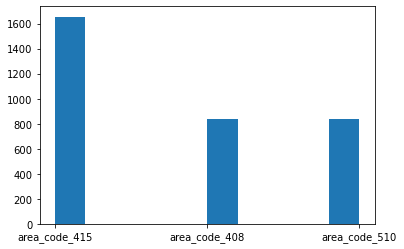

In [62]:
plt.hist(list(training2['area_code']))